In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Softmax

# importing data set from pickled files

In [2]:
import pickle

In [3]:
pickle_in = open("X.pickle", "rb")
X= pickle.load(pickle_in)

In [4]:
pickle_on = open("Y.pickle" , "rb")
Y = pickle.load(pickle_on)

# splitting data into test and training data


In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train_orig, X_test_orig,Y_train,Y_test = train_test_split(X,Y,test_size = 0.30)

In [7]:
Y_train = np.array(Y_train)

In [8]:
#Y_train = Y_train.reshape(1,10500)

In [9]:
Y_test = np.array(Y_test)

In [10]:
#Y_test = Y_test.reshape(1,4500)

In [11]:
Y_train.shape

(10500,)

In [12]:
Y_test.shape

(4500,)

In [13]:
X_train_orig.shape

(10500, 70, 70, 1)

In [14]:
X_test_orig.shape

(4500, 70, 70, 1)

# setting number of total training and test size

In [15]:
m_train = X_train_orig.shape[0]
m_test = X_test_orig.shape[0]

num_px = X_train_orig.shape[1]

In [16]:
print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("Height/Width of each image: num_px = " + str(num_px))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 1)")
print ("train_set_x shape: " + str(X_train_orig.shape))
print ("train_set_y shape: " + str(Y_train.shape))
print ("test_set_x shape: " + str(X_test_orig.shape))
print ("test_set_y shape: " + str(Y_test.shape))

Number of training examples: m_train = 10500
Number of testing examples: m_test = 4500
Height/Width of each image: num_px = 70
Each image is of size: (70, 70, 1)
train_set_x shape: (10500, 70, 70, 1)
train_set_y shape: (10500,)
test_set_x shape: (4500, 70, 70, 1)
test_set_y shape: (4500,)


# flattening the image into a vector

In [17]:
from cnn_utils import *

In [18]:
# X_train  = X_train_orig / 255.
# X_test = X_test_orig /255.
# Y_train = convert_to_one_hot(Y_train ,10).T
# Y_test = convert_to_one_hot(Y_test, 10 ).T
# print ("number of training examples = " + str(X_train.shape[0]))
# print ("number of test examples = " + str(X_test.shape[0]))
# print ("X_train shape: " + str(X_train.shape))
# print ("Y_train shape: " + str(Y_train.shape))
# print ("X_test shape: " + str(X_test.shape))
# print ("Y_test shape: " + str(Y_test.shape))

In [19]:
X_train = X_train_orig / 255.
X_test =  X_test_orig / 255.

# building convolution network

In [20]:
def get_model(input_shape):
    model = Sequential([
        Conv2D(8,kernel_size=3,padding="SAME",activation="relu",input_shape = input_shape),
        MaxPooling2D(pool_size =2),
        Flatten(),
        Dense(64,activation = "relu"),
        Dense(64,activation = "relu"),
        Dense(10,activation = "softmax")
    ])
    return model

In [21]:
model = get_model(X_train[0].shape)

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 70, 70, 8)         80        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 35, 35, 8)         0         
_________________________________________________________________
flatten (Flatten)            (None, 9800)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                627264    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 632,154
Trainable params: 632,154
Non-trainable params: 0
__________________________________________________

# compile model

In [23]:
def compile_model(model):
    model.compile(
    optimizer = "adam",
        loss = "sparse_categorical_crossentropy",
        metrics = ['accuracy']
    )

In [24]:
compile_model(model)

# fit the model to the training data

In [25]:
def train_model(model, scaled_train_images, train_labels):
    history= model.fit(scaled_train_images,train_labels,epochs = 5,verbose = 2)
    return history

In [26]:
history = train_model(model, X_train, Y_train)

Epoch 1/5
329/329 - 12s - loss: 2.0291 - accuracy: 0.2632
Epoch 2/5
329/329 - 12s - loss: 1.3021 - accuracy: 0.5626
Epoch 3/5
329/329 - 11s - loss: 0.9406 - accuracy: 0.7010
Epoch 4/5
329/329 - 12s - loss: 0.7479 - accuracy: 0.7633
Epoch 5/5
329/329 - 12s - loss: 0.5870 - accuracy: 0.8162


# plotting curvers

In [27]:
frame =pd.DataFrame(history.history)

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Accuracy')]

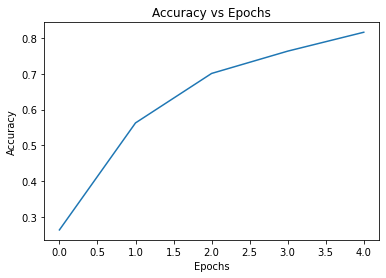

In [28]:
acc_plot = frame.plot(y="accuracy", title="Accuracy vs Epochs", legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Accuracy")

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Loss')]

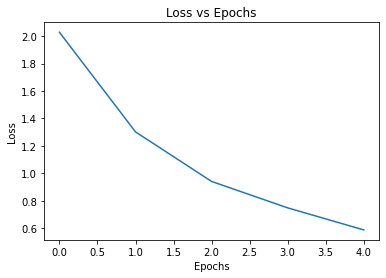

In [29]:
acc_plot = frame.plot(y="loss", title = "Loss vs Epochs",legend=False)
acc_plot.set(xlabel="Epochs", ylabel="Loss")

# evaluate the model

In [30]:
X_test.shape

(4500, 70, 70, 1)

In [31]:
Y_test.shape

(4500,)

In [32]:
Y_test[0]

9

In [33]:
for i in range(5):
    print(Y_test[i])
    print(type(Y_test[i]))\
    


9
<class 'numpy.int32'>
9
<class 'numpy.int32'>
5
<class 'numpy.int32'>
2
<class 'numpy.int32'>
8
<class 'numpy.int32'>


In [34]:
def evaluate_model(model, scaled_test_images, test_labels):
    test_loss,test_accuracy = model.evaluate(scaled_test_images,test_labels)
    return test_loss,test_accuracy

In [35]:
test_loss, test_accuracy = evaluate_model(model, X_test, Y_test)


141/141 [==============================] - 2s 14ms/step - loss: 0.7462 - accuracy: 0.7778


# model prediction

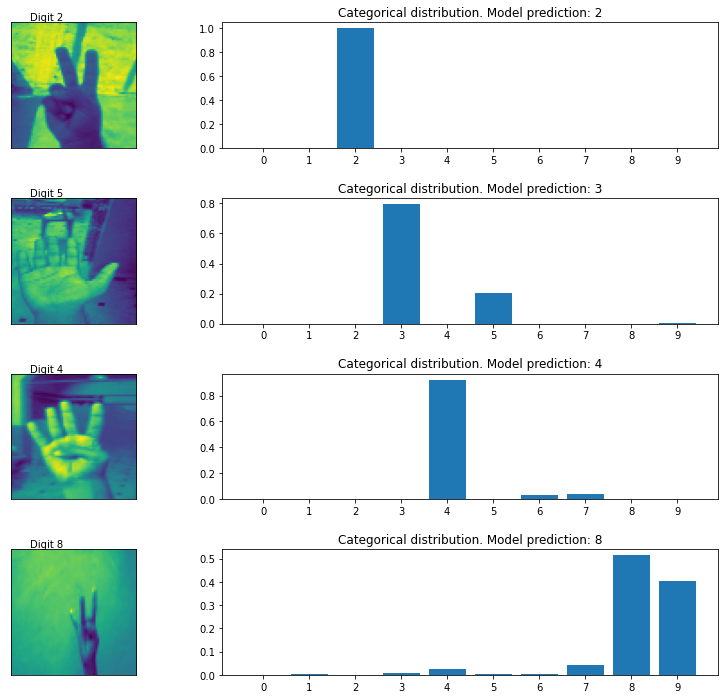

In [36]:
num_test_images = X_test.shape[0]

random_inx = np.random.choice(num_test_images, 4)
random_test_images = X_test[random_inx, ...]
random_test_labels = Y_test[random_inx, ...]

predictions = model.predict(random_test_images)

fig, axes = plt.subplots(4, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions, random_test_images, random_test_labels)):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)}")
    
plt.show()

# test custom image

In [42]:
from tensorflow.python.framework import ops
import os
import cv2
import tables

In [175]:
Datadir = "custom"
Categories = "1"

In [176]:
path = os.path.join(Datadir,Categories)

In [177]:

for img in os.listdir(path):
    img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
    

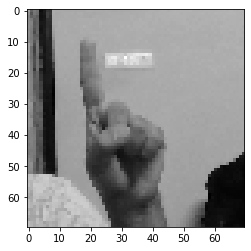

In [178]:
custom_image= []
Img_size = 70
new_array = cv2.resize(img_array,(Img_size , Img_size))
custom_image.append([new_array , 1])
plt.imshow(new_array,cmap ="gray")

In [179]:
len(custom_image)


1

In [180]:
X_custom =[]
Y_custom = []

for features,label in custom_image:
    X_custom.append(features)
    Y_custom.append(label)

In [181]:
import pickle

In [182]:
pickle_out = open("X_custom" , "wb")
pickle.dump(X_custom,pickle_out)
pickle_out.close()

In [183]:
pickle_in = open("X_custom" ,"rb")
X_cust =pickle.load(pickle_in)

In [184]:
X_cust = np.array(X_cust)

In [185]:
X_cust.shape

(1, 70, 70)

In [186]:
X_cust = X_cust.reshape(1,70,70,1)

In [187]:
X_cust.shape

(1, 70, 70, 1)

# custom image prediction

In [188]:
num_test_custom = X_cust.shape[0]
random_custom = np.random.choice(num_test_custom,1)
test_custom  = X_cust[random_custom,...]

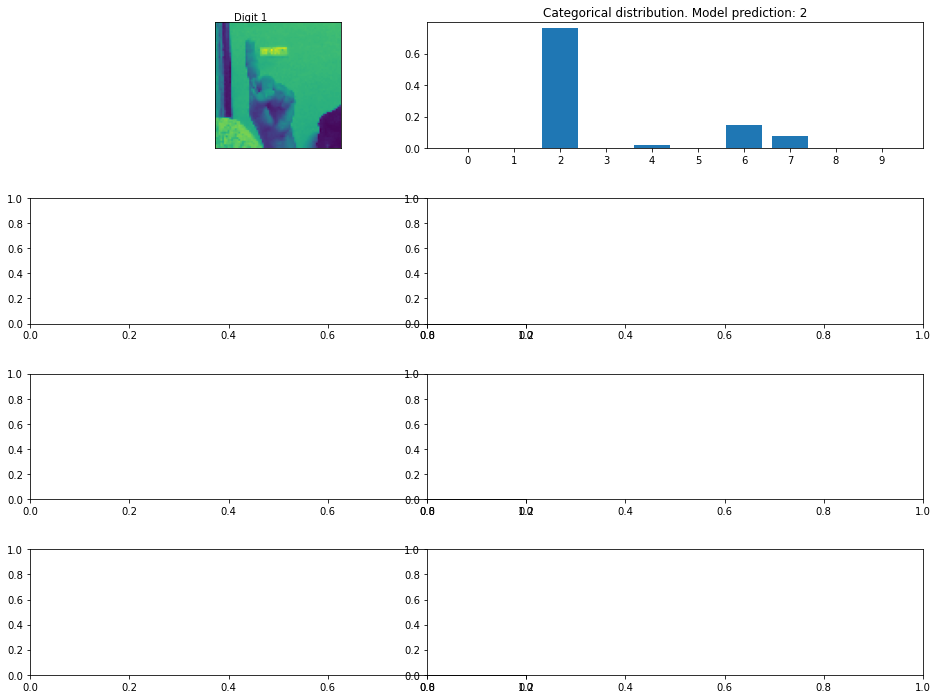

In [190]:
fig, axes = plt.subplots(4, 2, figsize=(16, 12))
fig.subplots_adjust(hspace=0.4, wspace=-0.2)

for i, (prediction, image, label) in enumerate(zip(predictions,test_custom, "1")):
    axes[i, 0].imshow(np.squeeze(image))
    axes[i, 0].get_xaxis().set_visible(False)
    axes[i, 0].get_yaxis().set_visible(False)
    axes[i, 0].text(10., -1.5, f'Digit {label}')
    axes[i, 1].bar(np.arange(len(prediction)), prediction)
    axes[i, 1].set_xticks(np.arange(len(prediction)))
    axes[i, 1].set_title(f"Categorical distribution. Model prediction: {np.argmax(prediction)}")
    
plt.show()

In [191]:
predictions_custom = model.predict(test_custom)

In [192]:
np.argmax(predictions_custom)

1

In [193]:
Y_cust =[5]

In [194]:
Y_cust =np.int32(Y_cust)

In [195]:
type(Y_cust[0])

numpy.int32

In [197]:
test_loss, test_accuracy = evaluate_model(model, test_custom, Y_cust)

1/1 [==============================] - 0s 997us/step - loss: 5334.1514 - accuracy: 0.0000e+00
